# (Ford GoBike System Data)
## by (Hany Awadalla)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
df = pd.read_csv('fordgobike-tripdata.csv')
print(df.shape)
df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


In [5]:
df["start_time"].min(), df["end_time"].max()

('2019-02-01 00:00:20.6360', '2019-03-01 08:01:55.9750')

In [6]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### What is the structure of your dataset?

> The dataset consists of 16 variables and 183412 entries which represent each bike ride including information about the customer such as birth year, customer type and gender in addition to trip details such as starting and ending stations, duration and other details.
> The data collected withing a period of one month starting in 2019-02-01 and ending in 2019-03-01.

### What is/are the main feature(s) of interest in your dataset?

> the manin feature here will be the duration of the trips and the numbers of trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> starting and ending time will be helpful in understanding the timing the the days of the trips, gender and user type will be used to help hus understand who is more likely to take trios more than other.

### Let's check the null values

In [7]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
na_counts = df[['start_station_id','start_station_name','end_station_id','end_station_name','member_birth_year',
               'member_gender']].isna().sum()
na_counts

start_station_id       197
start_station_name     197
end_station_id         197
end_station_name       197
member_birth_year     8265
member_gender         8265
dtype: int64

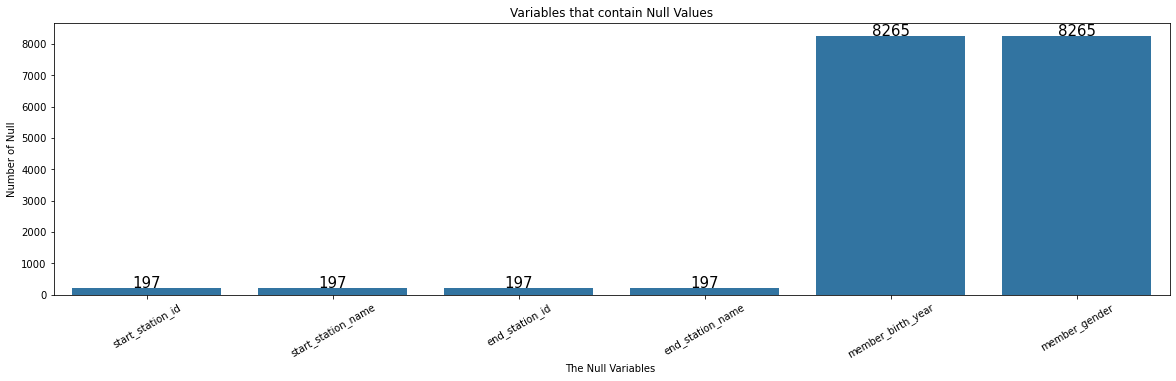

In [9]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [20, 5]) 
sb.barplot(na_counts.index.values, na_counts, color = base_color )
# get the current tick locations and labels
plt.xticks(rotation=30) 
plt.xlabel('The Null Variables ');
plt.title('Variables that contain Null Values');
plt.ylabel('Number of Null');

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i,count+400, count, ha = 'center', va='top', size = 15)


In [10]:
df.dropna(inplace = True)
df.shape

(174952, 16)

## Univariate Exploration

> In this section, investigate distributions of individual variables. Such as User_type, member_gender,duration_sec, starting station and time of the trips.             

## User_type & member_gender Visualizations

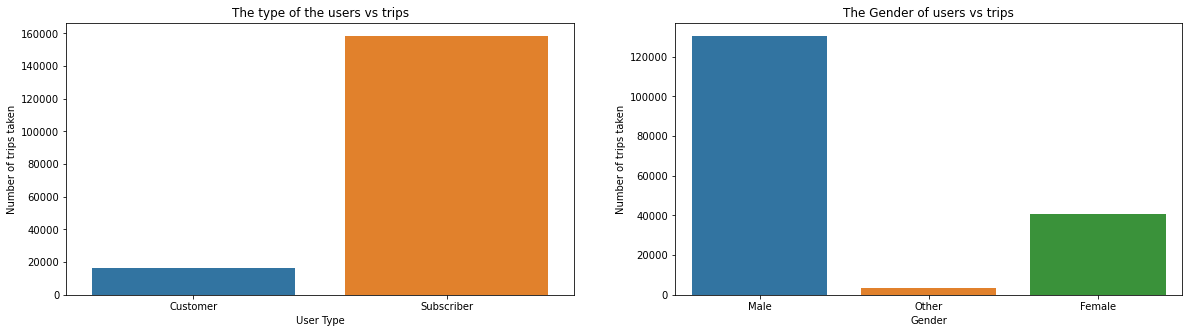

In [11]:
plt.figure(figsize = [20, 5]) 
plt.subplot(1, 2, 1)
sb.countplot(data=df, x='user_type');
plt.xlabel('User Type');
plt.title('The type of the users vs trips');
plt.ylabel('Number of trips taken');

plt.subplot(1, 2, 2)
sb.countplot(data=df, x='member_gender');
plt.xlabel('Gender');
plt.title('The Gender of users vs trips');
plt.ylabel('Number of trips taken');

> we can see crlearly the difference between groups of scbscribers and customer, in addition to to the high volume of male customers.

## Trip duration analysis

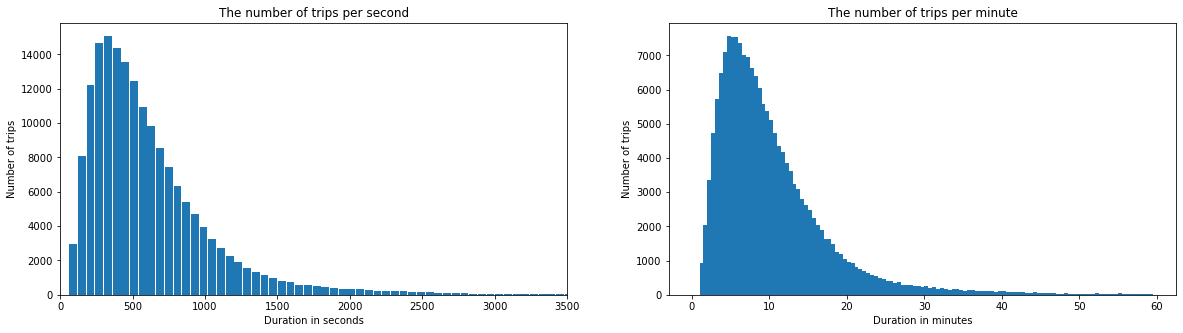

In [12]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1)
bins = np.arange(0, df['duration_sec'].max()+100,60)
plt.hist(data = df, x = 'duration_sec', bins = bins, rwidth = 0.9)
plt.xlim(0,3500);
plt.xlabel('Duration in seconds');
plt.title('The number of trips per second');
plt.ylabel('Number of trips');

plt.subplot(1, 2, 2)
df['duration_in_min'] = df['duration_sec']/60
bins = np.arange(0, 60,.5)

plt.hist(data = df, x = 'duration_in_min', bins = bins, rwidth = 1)

plt.xlabel('Duration in minutes');
plt.title('The number of trips per minute');
plt.ylabel('Number of trips');

In [13]:
df['duration_in_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_in_min, dtype: float64

> The above histograms show that data are skewed to the right, the majority of the trips fall within 3 to 10 minutes, however it's not very clear, let's do some log transformation for better analysis

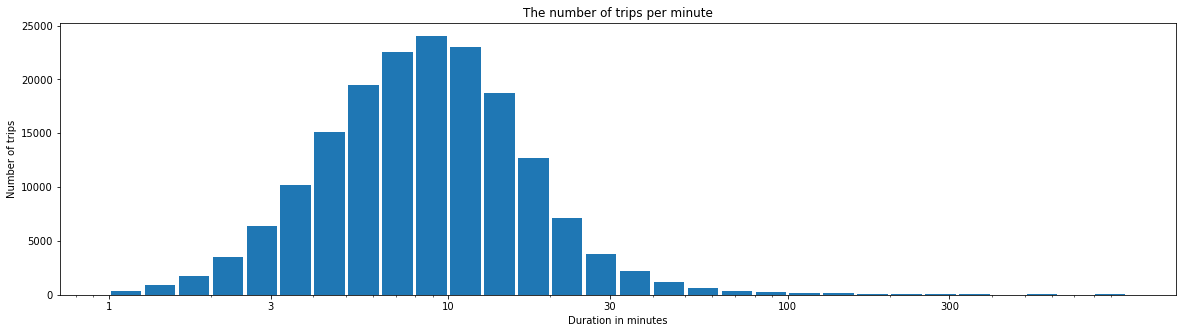

In [14]:
plt.figure(figsize = [20, 5]) 
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_in_min' , bins = bins, rwidth = 0.9);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration in minutes');
plt.title('The number of trips per minute');
plt.ylabel('Number of trips');

## Starting Station Analysis.

In [15]:
df['start_station_name'].nunique()

329

> The starting station name variable contains high cardienality, So let's check the most popular and the least popular stations 

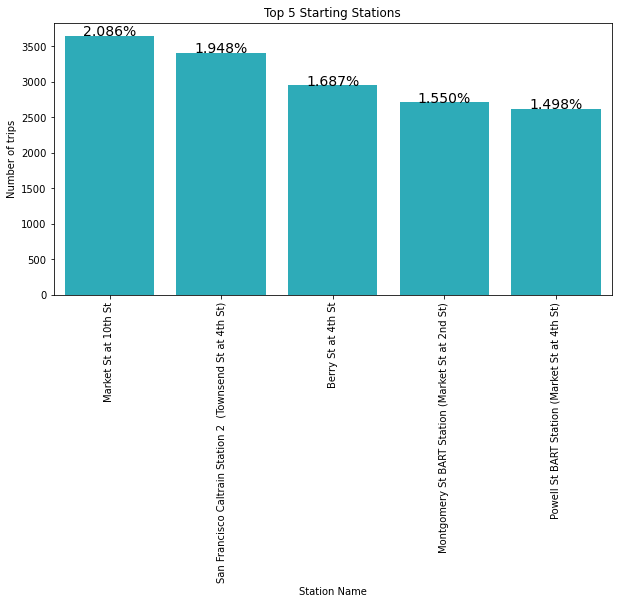

In [18]:
base_color = sb.color_palette()[9]
plt.figure(figsize = [10, 5])
p1 = sb.countplot(x="start_station_name", data=df, order=df.start_station_name.value_counts().iloc[:5].index,
                  color=base_color)
plt.xticks(rotation=45);
plt.xlabel("Station Name")
plt.title("Top 5 Starting Stations")
plt.ylabel('Number of trips');
type_counts = df['start_station_name'].value_counts()
locs, labels = plt.xticks(rotation=90)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.3f}%'.format(100*count/len(df))
    plt.text(loc, count+.1, pct_string, ha='center', color = 'black', size = 14)

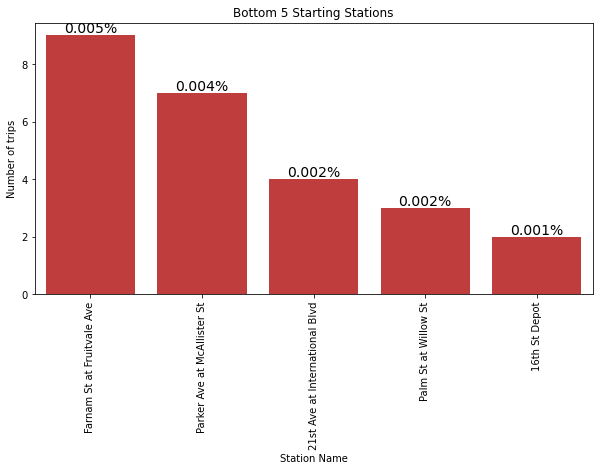

In [20]:
base_color = sb.color_palette()[3]
plt.figure(figsize = [10, 5])
p2 = sb.countplot(x="start_station_name", data=df, order=df.start_station_name.value_counts().iloc[-5:].index,
                  color=base_color)
plt.xticks(rotation=45);
plt.xlabel("Station Name")
plt.title("Bottom 5 Starting Stations")
plt.ylabel('Number of trips');
locs, labels = plt.xticks(rotation=90) 
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.3f}%'.format(100*count/len(df))
    plt.text(loc, count+.1, pct_string, color = 'black',ha='center', size = 14)

## Start Time and Day Analysis.

In [578]:
df['Start_Time'] = pd.to_datetime(df['start_time'])
df['hour'] = df['Start_Time'].dt.hour

In [579]:
df['hour'].value_counts()

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: hour, dtype: int64

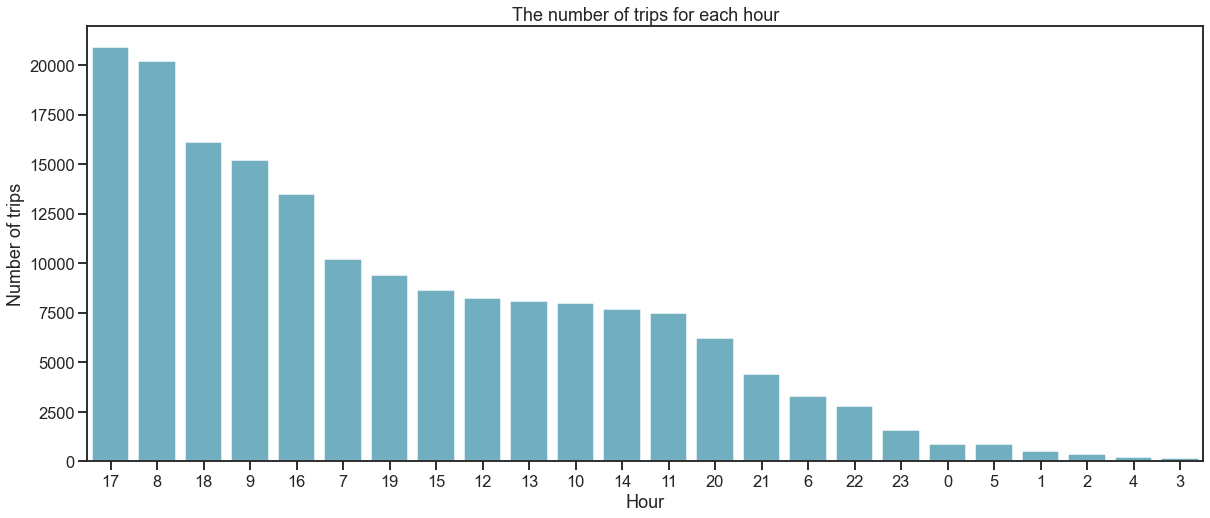

In [592]:
base_color = sb.color_palette()[9]
plt.figure(figsize = [20, 8])
freq = df['hour'].value_counts()

gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=df, x='hour', color=base_color, order=gen_order);
plt.xlabel("Hour")
plt.title("The number of trips for each hour")
plt.ylabel('Number of trips');


> The most frequent hour of taking the bike trip is at 17 hours followed by 8, and the least frequent is from midnight and it increases again in the morning.  

## Univariate Exploration

> In this section,we will explore variables and their impact on the other variables such as duration on the trips.

## Trip Duration and Trip Hours Analysis.

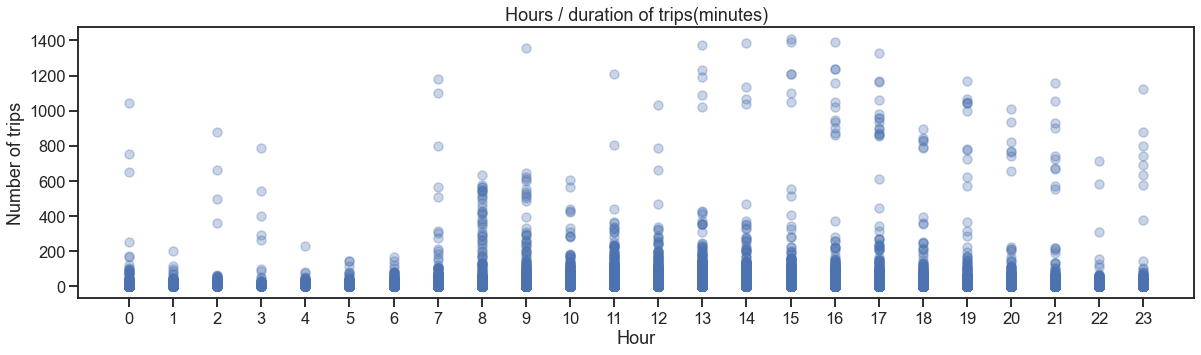

In [593]:
nhours = df['hour'].unique()
plt.figure(figsize = [20, 5])
plt.scatter(data = df, x = 'hour', y = 'duration_in_min', alpha=0.3);
plt.xticks(nhours);
plt.xlabel("Hour")
plt.title("Hours / duration of trips(minutes)")
plt.ylabel('Number of trips');

The plot explains the variabilities of the trip duration at every hour, if we take a closer look at 8 and 9 in the moring we can tell they have the least variability even with high number of trips, however 16 amd 17 have high variabilities.  

## Day Of The Week Analysis.

In [590]:
df['day_name'] = df['Start_Time'].dt.day_name()
df['day_num'] = df['Start_Time'].dt.dayofyear

In [637]:
vday = [ 'Monday','Tuesday', 'Wednesday','Thursday' ,'Friday','Saturday','Sunday']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=vday)


df['Vday_name'] = df['day_name'].astype(vclasses);

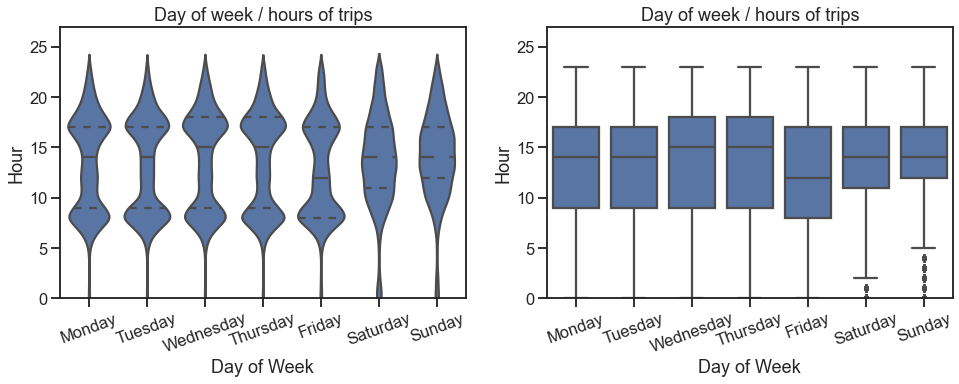

In [638]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df, x='Vday_name', y='hour', color=base_color, inner='quartile')
plt.xticks(rotation=20);
plt.ylim(0,27)
plt.xlabel("Day of Week")
plt.title("Day of week / hours of trips")
plt.ylabel('Hour');

plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='Vday_name', y='hour', color=base_color)
plt.xticks(rotation=20)
plt.ylim(ax1.get_ylim());
plt.xlabel("Day of Week")
plt.title("Day of week / hours of trips")
plt.ylabel('Hour');

> Another intresting finding here, if we look at saturday and sunday we will notice the most frequent hours to go for bike trips are increasing after 10 in the morning reaching the peak around noon and start decreasing around 16, the other weekdays show high use of bikes early moring and another high use around 14.  
> The reason can be during weekdays users taking the bikes going to work and coming back. The boxplot also show less uses of bikes during weekends, so let's explore this further.

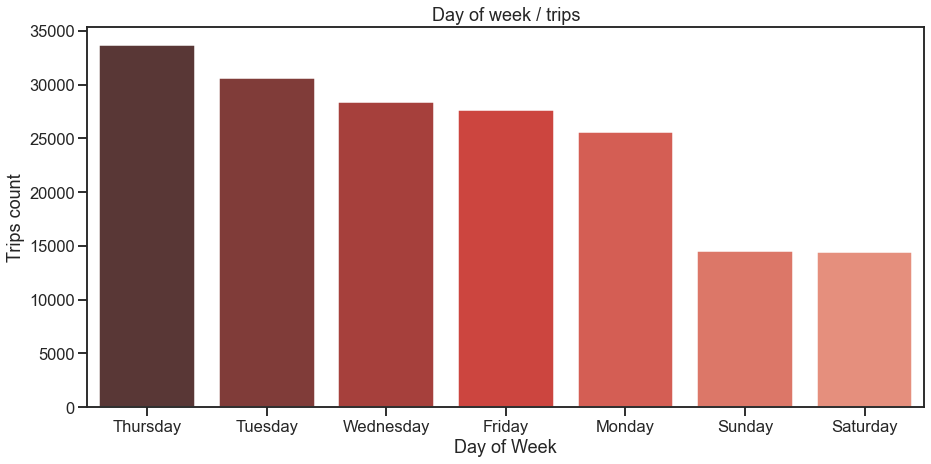

In [639]:
plt.figure(figsize = [15, 7])
total = df['day_name'].value_counts().sum()
day = df['day_name'].value_counts()
y = (day / total)
yy = (day / total).reset_index()
pal = sb.color_palette("Reds_d", len(y))
rank = y.argsort().argsort()
g = sb.barplot(x=df['day_name'].value_counts().index, y=df['day_name'].value_counts(),
               palette=np.array(pal[::-1])[rank] );
plt.xlabel("Day of Week")
plt.title("Day of week / trips")
plt.ylabel('Trips count');

> THis parblot agrees with our previous findings, but does weekend alos affect the trip duration? lets see that.

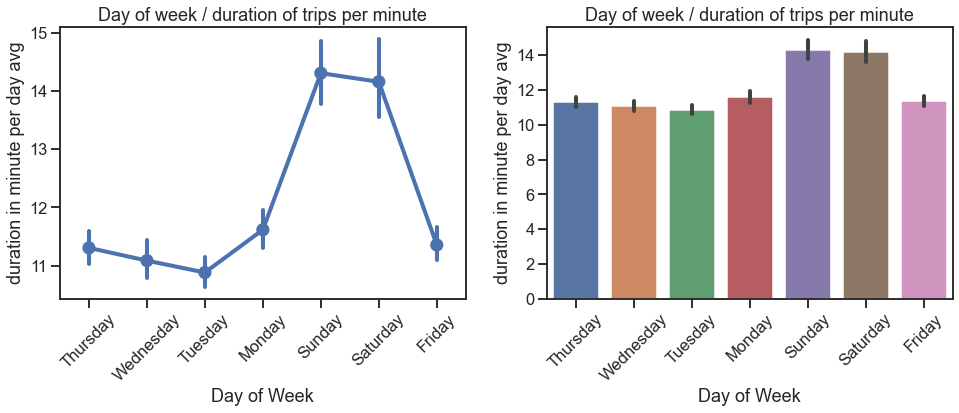

In [598]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.pointplot(data=df, x='day_name', y='duration_in_min', color=base_color)
plt.xticks(rotation=45);
plt.ylabel('duration in minute per day avg')
plt.xlabel("Day of Week")
plt.title("Day of week / duration of trips per minute");



plt.subplot(1, 2, 2)
sb.barplot(data=df, x='day_name', y='duration_in_min')
plt.xticks(rotation=45);
plt.ylabel('duration in minute per day avg')
plt.xlabel("Day of Week")
plt.title("Day of week / duration of trips per minute");

> The above graphs showed that during weekends the duration of trips increases.

## Multivariate Exploration

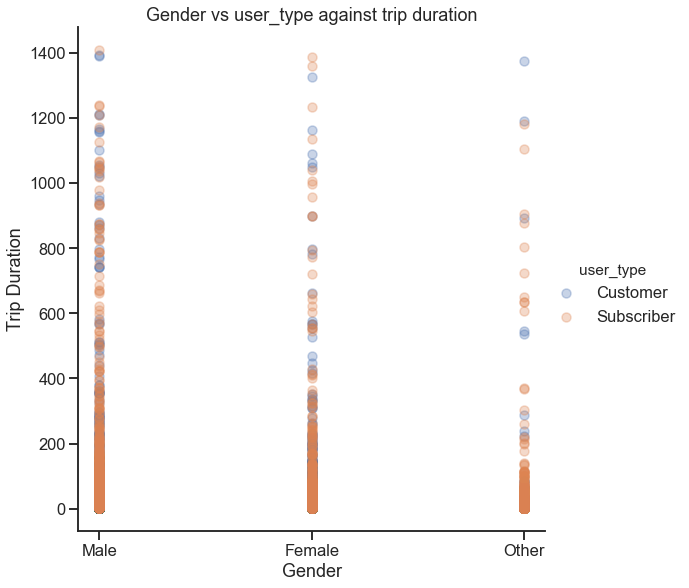

In [600]:
f =sb.FacetGrid(data =  df, hue = 'user_type', height = 8)
f.map(plt.scatter, 'member_gender','duration_in_min', alpha = 0.3)
f.add_legend()
plt.title('Gender vs user_type against trip duration')
plt.xlabel('Gender')
plt.ylabel('Trip Duration');

THe plot shows the relation between three variables, gender and user type corresponding to the trip duration, the scatter plot shows more subscriber and male useres than other categories.

### Let's Explore the Age, Gender, and trip duration

we will be creating age groups by 10 years interval, calculating the age will be by substracting the birth year from the year the have take the trip wich is 2019

In [601]:
df['Age']= 2019 - df['member_birth_year']
list= []
for i in df['Age']:
    if i < 11:
        list.append('0:10')
    elif i > 10 and i < 21:
        list.append('11:20')
    elif i > 20 and i < 31:
        list.append('21:30')
    elif i > 30 and i < 41:
        list.append('31:40')
    elif i > 40 and i < 51:
        list.append('41:50')
    elif i > 50 and i < 61:
        list.append('51:60')
    elif i > 60 and i < 71:
        list.append('61:70')
    elif i > 70:
        list.append('70+')
df['age_group'] = list

Now we can create another multivariate plot using age group.

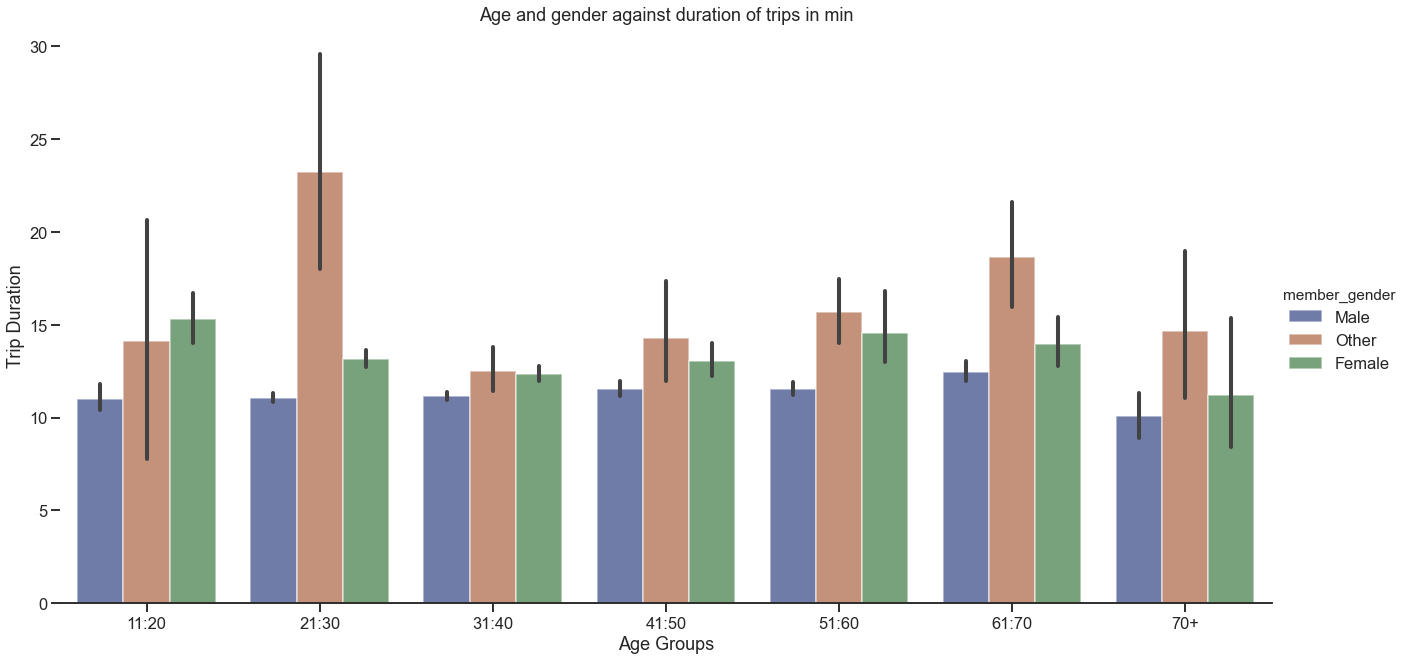

In [620]:

order = df.groupby('age_group').size().index
g = sb.catplot(
    data=df, kind="bar",
    x="age_group", y="duration_in_min", hue="member_gender",palette="dark",
    alpha=.6,height= 9, aspect = 2, order = order  )
g.despine(left=True);
g.set_axis_labels("", "");
plt.title('Age and gender against duration of trips in min')
plt.xlabel('Age Groups')
plt.ylabel('Trip Duration');


The plot showes that group other is usually having longer trips, the age of 20 up to 30 years taking longer trips than other groups.


# End of Slides.